# 2020 Homeless Count Data by Census Tract
### Source: Economic Roundtable https://economicrt.org/publication/los-angeles-county-homeless-count-data-library/



In [1]:
import pandas as pd

df = pd.read_excel('2020-Street-Count-Results-by-Census-Tract-trimmed.xlsx')

In [2]:
df

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,...,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,...,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,...,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,...,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,...,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,...,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5


In [3]:
# We've got lat long so let's turn this into a GDF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID_LA_Cou      2344 non-null   int64  
 1   STATEFP10       2344 non-null   int64  
 2   COUNTYFP10      2344 non-null   int64  
 3   TRACTCE10       2344 non-null   int64  
 4   GEOID10         2344 non-null   int64  
 5   Non-CoC Flag    2344 non-null   int64  
 6   Non-CoC Place   2344 non-null   object 
 7   NAME10          2344 non-null   float64
 8   NAMELSAD10      2344 non-null   object 
 9   CT_NAME         1695 non-null   object 
 10  MTFCC10         2344 non-null   object 
 11  FUNCSTAT10      2344 non-null   object 
 12  ALAND10         2344 non-null   int64  
 13  AWATER10        2344 non-null   int64  
 14  INTPTLAT10      2344 non-null   float64
 15  INTPTLON10      2344 non-null   float64
 16  FID_Servic      2344 non-null   int64  
 17  SPA_NAME        2344 non-null   o

In [4]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.INTPTLON10, df.INTPTLAT10))

In [5]:
gdf

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,...,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,...,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29299 34.25947)
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,...,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29015 34.26772)
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,...,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29073 34.25297)
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,...,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.28163 34.25161)
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,...,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.27100 34.24878)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2046,6,37,577602,6037577602,2,"Long Beach city, CA",5776.02,Census Tract 5776.02,Bixby Village Golf Course,...,1324998,69272,33.770058,-118.112671,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11267 33.77006)
2340,2044,6,37,577603,6037577603,2,"Long Beach city, CA",5776.03,Census Tract 5776.03,Marine Stadium Acueducto,...,2682520,298384,33.769113,-118.127319,7,SPA 8: South Bay,8,NaN,4,POINT (-118.12732 33.76911)
2341,2159,6,37,577604,6037577604,2,"Long Beach city, CA",5776.04,Census Tract 5776.04,NaN,...,853432,645395,33.755750,-118.110085,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11009 33.75575)
2342,1695,6,37,980018,6037980018,2,"Long Beach city, CA",9800.18,Census Tract 9800.18,NaN,...,7372384,21307,33.815252,-118.153909,7,SPA 8: South Bay,8,NaN,4,POINT (-118.15391 33.81525)


<AxesSubplot:>

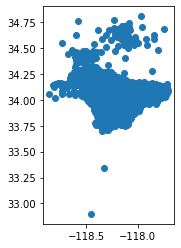

In [7]:
gdf.plot()